In [68]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import json

# 1. Load dữ liệu từ file json

In [44]:
def read_file(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

In [45]:
files_commits = read_file('files_commits1.json')
files_size = read_file('files_size.json')
source = {}
for file in files_size:
    source[file['name']] = file['size']
files_size = source

# 2. Làm sạch dữ liệu để tạo DataFrame và tạo các mảng sắp xếp

In [92]:
files_data = {}
for file in files_size.keys():
        if file not in files_commits.keys():
                files_commits[file] = {
                        'commits': 0,
                        'additions': 0,
                        'deletions': 0,
                        'changes': 0
                }
        data = {
                'commits': files_commits[file]['commits'],
                'additions': files_commits[file]['additions'],
                'deletions': files_commits[file]['deletions'],
                'changes': files_commits[file]['changes'],
                'size': files_size[file]
        }
        files_data[file] = data

sorted_file_commits = np.array(sorted(files_data.items(), key= lambda item : item[1]['commits'], reverse=True))
sorted_file_size = np.array(sorted(files_data.items(), key= lambda item : item[1]['size'], reverse= True))
sorted_file_additions = np.array(sorted(files_data.items(), key= lambda item : item[1]['additions'], reverse= True))
sorted_file_deletions = np.array(sorted(files_data.items(), key= lambda item : item[1]['deletions'], reverse= True))
sorted_file_changes = np.array(sorted(files_data.items(), key= lambda item : item[1]['additions'], reverse= True))


# 3. DataFrame biểu diễn dữ liệu của files

In [66]:
name = pd.Series(files_data.keys(), name= 'Name')
additions = []
deletions = []
changes = []
size = []
commits = []
for file in files_data.values():
    additions.append(file['additions'])
    deletions.append(file['deletions'])
    changes.append(file['changes'])
    size.append(file['size'])
    commits.append(file['commits'])
additions = pd.Series(additions, name= 'Additions')
deletions = pd.Series(deletions, name= 'Deletions')
changes = pd.Series(changes, name= 'Changes')
size = pd.Series(size, name= 'Size')
commits = pd.Series(commits, name= 'Commits')

files_frame = pd.DataFrame([name, additions, deletions, changes, size, commits]).T
    
files_frame

,Name,Additions,Deletions,Changes,Size,Commits
0,.clang-format,0,0,0,6157,0
1,.clang-tidy,0,4,4,2186,4
2,.editorconfig,0,0,0,396,0
3,.git-blame-ignore-revs,42,0,42,1840,3
4,.gitattributes,12,6,18,607,4
...,...,...,...,...,...,...
11083,thirdparty/zstd/decompress/zstd_decompress_blo...,2,2,4,2682,2
11084,thirdparty/zstd/decompress/zstd_decompress_int...,4,0,4,9687,2
11085,thirdparty/zstd/zstd.h,258,120,378,175838,2
11086,thirdparty/zstd/zstd_errors.h,0,0,0,4532,0


# 4. Tổng dung lượng của repo

In [106]:
sum(files_frame['Size'])

197408947

# 5. Kích thước trung bình của 1 file

In [104]:
files_frame['Size'].mean()

17803.83721139971

# 6. Thống kê kích thước của files

In [130]:
files_frame['Size'].astype('int32').describe()

count    1.108800e+04
mean     1.780384e+04
std      1.238272e+05
min      0.000000e+00
25%      7.117500e+02
50%      3.808000e+03
75%      1.129550e+04
max      7.389092e+06
Name: Size, dtype: float64

# 7. Thống kê additions của files

In [132]:
files_frame['Additions'].astype('int32').describe()

count     11088.000000
mean        150.265242
std        2914.846767
min           0.000000
25%           0.000000
50%           0.000000
75%          18.000000
max      284107.000000
Name: Additions, dtype: float64

# 8. Thống kê deletions của files

In [133]:
files_frame['Deletions'].astype('int32').describe()

count    11088.000000
mean        47.434343
std        469.866808
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max      30562.000000
Name: Deletions, dtype: float64

# 9. Thống kê changes của files

In [134]:
files_frame['Changes'].astype('int32').describe()

count     11088.000000
mean        197.699585
std        3208.119796
min           0.000000
25%           0.000000
50%           0.000000
75%          30.000000
max      303614.000000
Name: Changes, dtype: float64

# 10. Thống kê commits của files

In [135]:
files_frame['Commits'].astype('int32').describe()

count    11088.000000
mean         2.698052
std          7.304501
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        252.000000
Name: Commits, dtype: float64

# Trực quan hóa dữ liệu

# 1. 10 files có nhiều additions nhất

C:\Users\hshoa\AppData\Local\Temp\ipykernel_11924\1019580854.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_file_additions[:10, 0], rotation= 90)


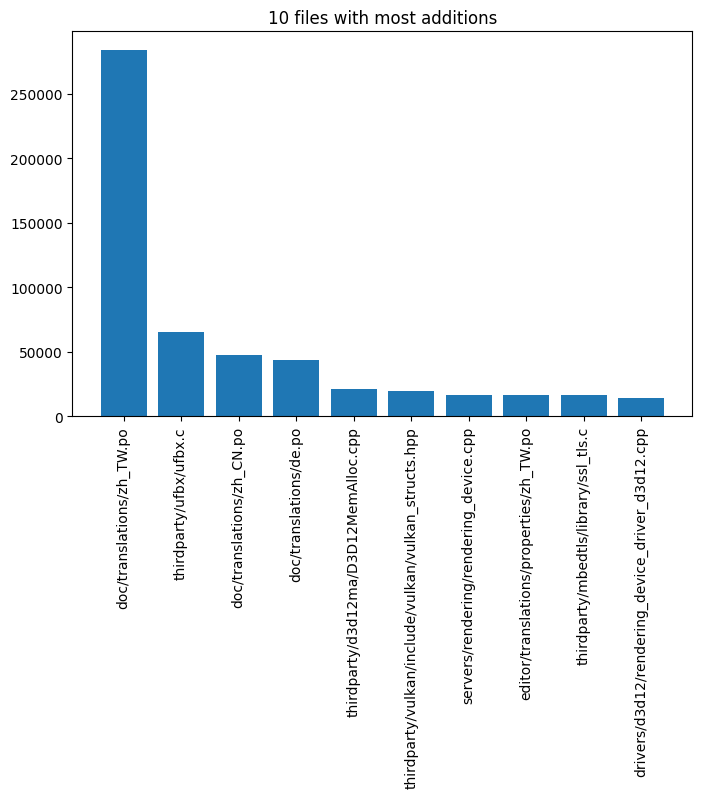

In [87]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.bar(sorted_file_additions[:10, 0], np.array([file['additions'] for file in sorted_file_additions[:10, 1]]))
ax.set_xticklabels(sorted_file_additions[:10, 0], rotation= 90)
ax.set_title('10 files with most additions')
plt.show()

# 2. 10 files có nhiều deletions nhất

C:\Users\hshoa\AppData\Local\Temp\ipykernel_11924\126749527.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_file_deletions[:10, 0], rotation= 90)


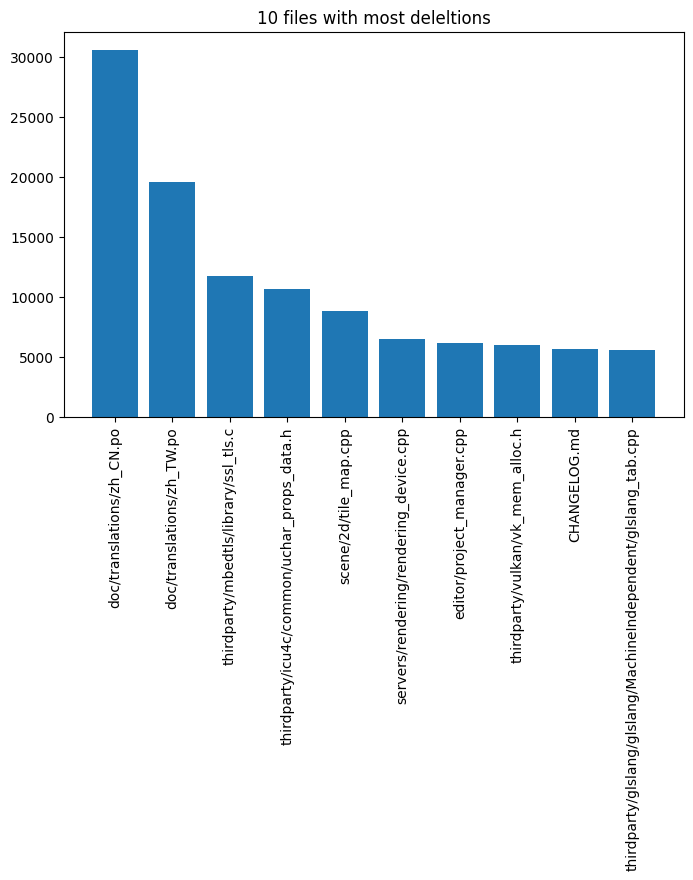

In [90]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.bar(sorted_file_deletions[:10, 0], np.array([file['deletions'] for file in sorted_file_deletions[:10, 1]]))
ax.set_xticklabels(sorted_file_deletions[:10, 0], rotation= 90)
ax.set_title('10 files with most deleltions')
plt.show()

# 3. 10 files có nhiều changes nhất

C:\Users\hshoa\AppData\Local\Temp\ipykernel_11924\1386077525.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_file_changes[:10, 0], rotation= 90)


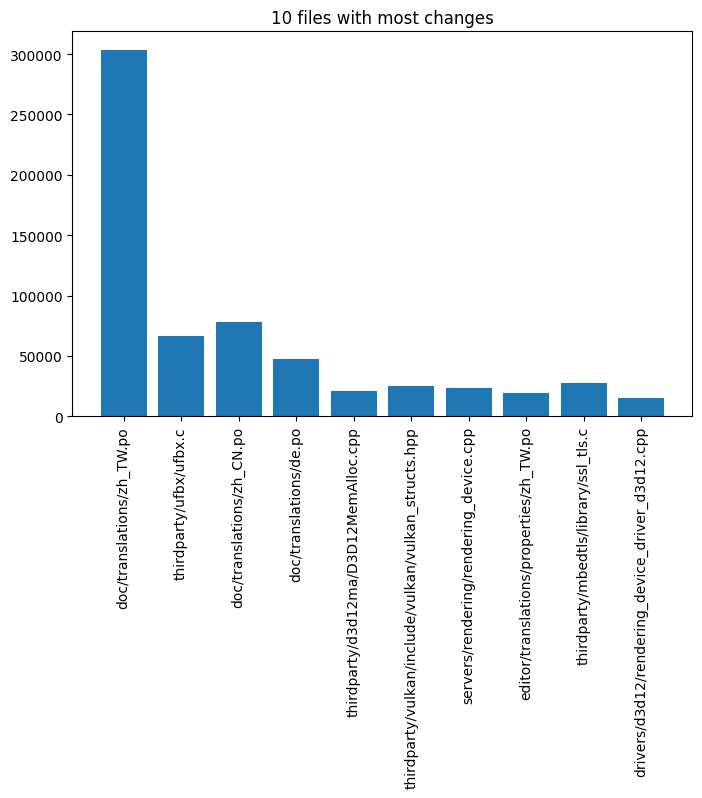

In [91]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.bar(sorted_file_changes[:10, 0], np.array([file['changes'] for file in sorted_file_changes[:10, 1]]))
ax.set_xticklabels(sorted_file_changes[:10, 0], rotation= 90)
ax.set_title('10 files with most changes')
plt.show()

# 4. 10 files có nhiều commits nhất

C:\Users\hshoa\AppData\Local\Temp\ipykernel_11924\3418595564.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_file_commits[:10, 0], rotation= 90)


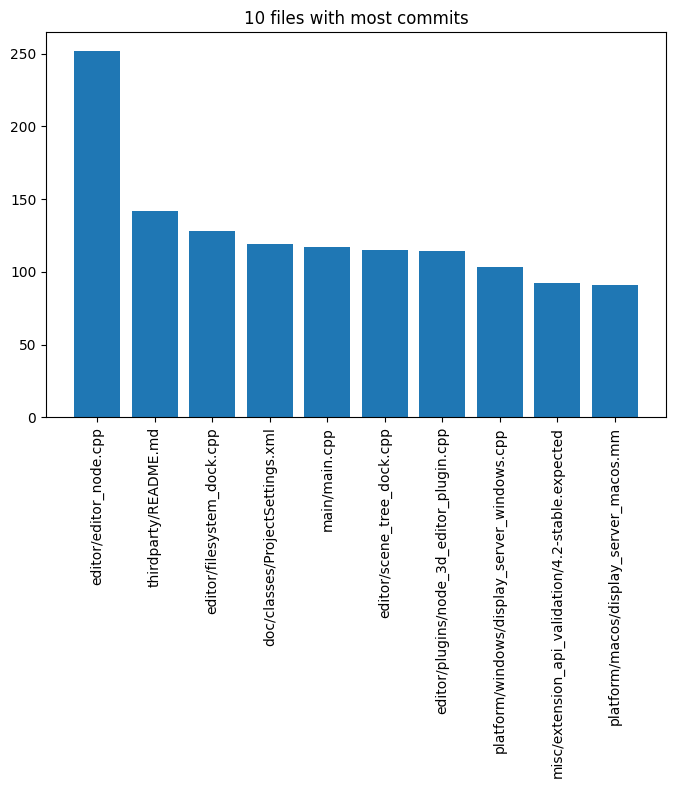

In [93]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.bar(sorted_file_commits[:10, 0], np.array([file['commits'] for file in sorted_file_commits[:10, 1]]))
ax.set_xticklabels(sorted_file_commits[:10, 0], rotation= 90)
ax.set_title('10 files with most commits')
plt.show()

# 5. 10 files lớn nhất trong repo

C:\Users\hshoa\AppData\Local\Temp\ipykernel_11924\3954936093.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_file_size[:10, 0], rotation= 90)


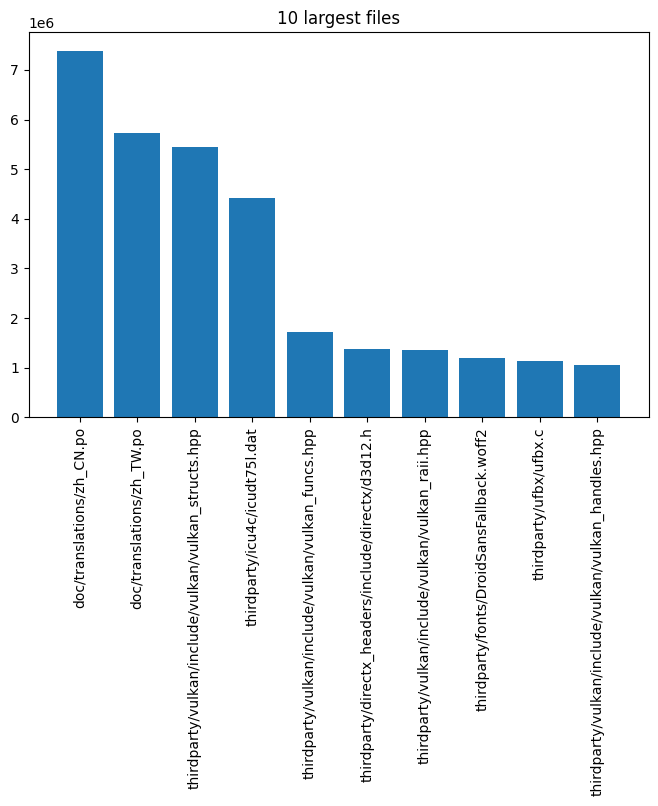

In [94]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.bar(sorted_file_size[:10, 0], np.array([file['size'] for file in sorted_file_size[:10, 1]]))
ax.set_xticklabels(sorted_file_size[:10, 0], rotation= 90)
ax.set_title('10 largest files')
plt.show()

# 6. Scatter plot biểu diễn mối quan hệ giữa kích thước file và số thay đổi trong file

Text(0, 0.5, 'Changes')

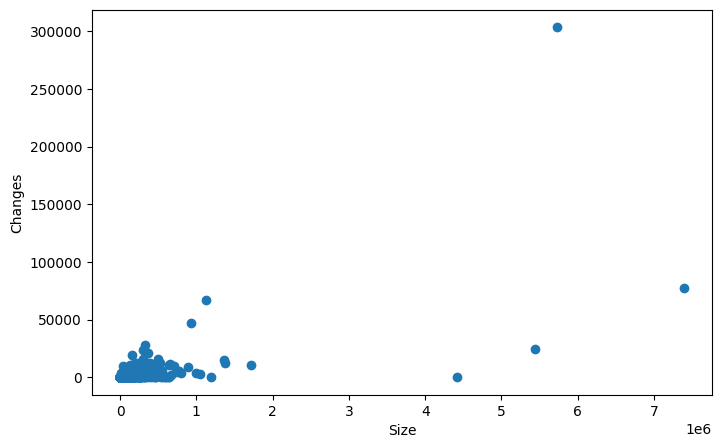

In [108]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.scatter(np.array([file['size'] for file in files_data.values()]),
           np.array([file['changes'] for file in files_data.values()]))
ax.set_xlabel('Size')
ax.set_ylabel('Changes')
           

# 7. Scatter plot biểu diễn mối quan hệ giữa kích thước file và số lượng commits của file đó

Text(0, 0.5, 'Commits')

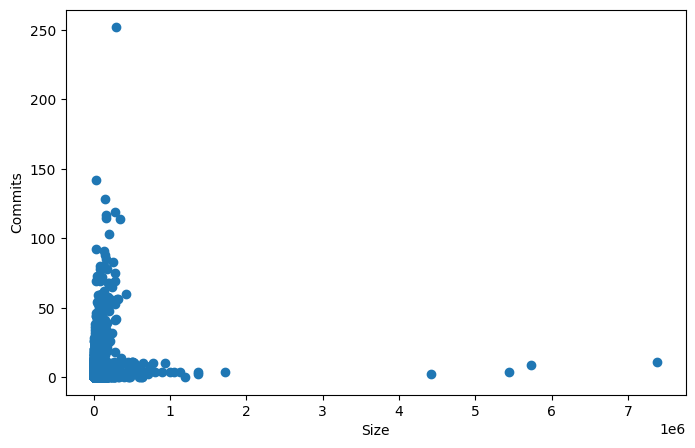

In [109]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.scatter(np.array([file['size'] for file in files_data.values()]),
           np.array([file['commits'] for file in files_data.values()]))
ax.set_xlabel('Size')
ax.set_ylabel('Commits')
           